In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv("TMDB_movie_dataset_v11.csv")


data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372750 entries, 0 to 1372749
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1372750 non-null  int64  
 1   title                 1372732 non-null  object 
 2   vote_average          1372750 non-null  float64
 3   vote_count            1372750 non-null  int64  
 4   status                1372750 non-null  object 
 5   release_date          1080311 non-null  object 
 6   revenue               1372750 non-null  int64  
 7   runtime               1372750 non-null  int64  
 8   adult                 1372750 non-null  bool   
 9   backdrop_path         344648 non-null   object 
 10  budget                1372750 non-null  int64  
 11  homepage              141728 non-null   object 
 12  imdb_id               657554 non-null   object 
 13  original_language     1372750 non-null  object 
 14  original_title        1372732 non-

In [20]:
#filter out randomly to  100000 rows

data = data.sample(10000)


data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 14760 to 779961
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   vote_average          10000 non-null  float64
 3   vote_count            10000 non-null  int64  
 4   status                10000 non-null  object 
 5   release_date          7936 non-null   object 
 6   revenue               10000 non-null  int64  
 7   runtime               10000 non-null  int64  
 8   adult                 10000 non-null  bool   
 9   backdrop_path         2574 non-null   object 
 10  budget                10000 non-null  int64  
 11  homepage              1032 non-null   object 
 12  imdb_id               4800 non-null   object 
 13  original_language     10000 non-null  object 
 14  original_title        10000 non-null  object 
 15  overview           

In [ ]:
#save the data to this folder
data.to_csv("TMDB_movie_dataset_v11_10000.csv", index=False)







## run from here

In [20]:
import pandas as pd

data = pd.read_csv("TMDB_movie_dataset_v11_10000.csv")









In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object', 'bool']).columns

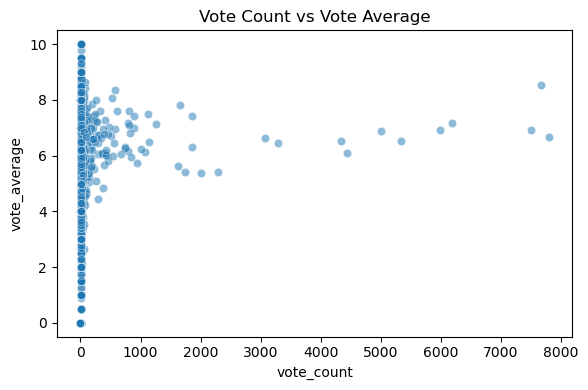

In [22]:
if {'vote_count', 'vote_average'}.issubset(data.columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        data=data.sample(min(50000, len(data))),
        x='vote_count',
        y='vote_average',
        alpha=0.5
    )
    plt.title("Vote Count vs Vote Average")
    plt.tight_layout()
    plt.show()


How a movie’s popularity (number of votes) relates to its average rating.

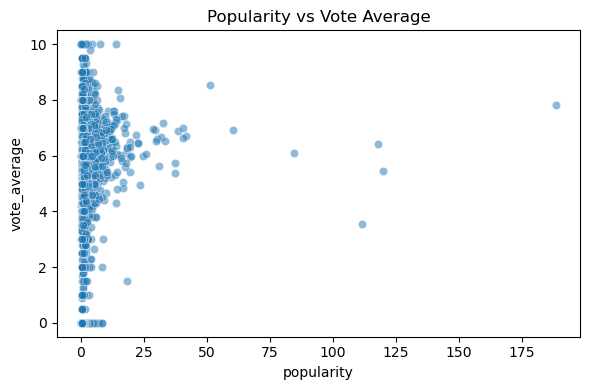

In [23]:

if {'popularity', 'vote_average'}.issubset(data.columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        data=data.sample(min(50000, len(data))),
        x='popularity',
        y='vote_average',
        alpha=0.5
    )
    plt.title("Popularity vs Vote Average")
    plt.tight_layout()
    plt.show()

Whether more popular movies tend to have higher or lower ratings, and how popularity relates to movie quality.

/var/folders/3l/xqzc2sld199frtd0ts51l0gm0000gp/T/ipykernel_58169/1804881885.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_budget_data['profit'] = filtered_budget_data['revenue'] - filtered_budget_data['budget']


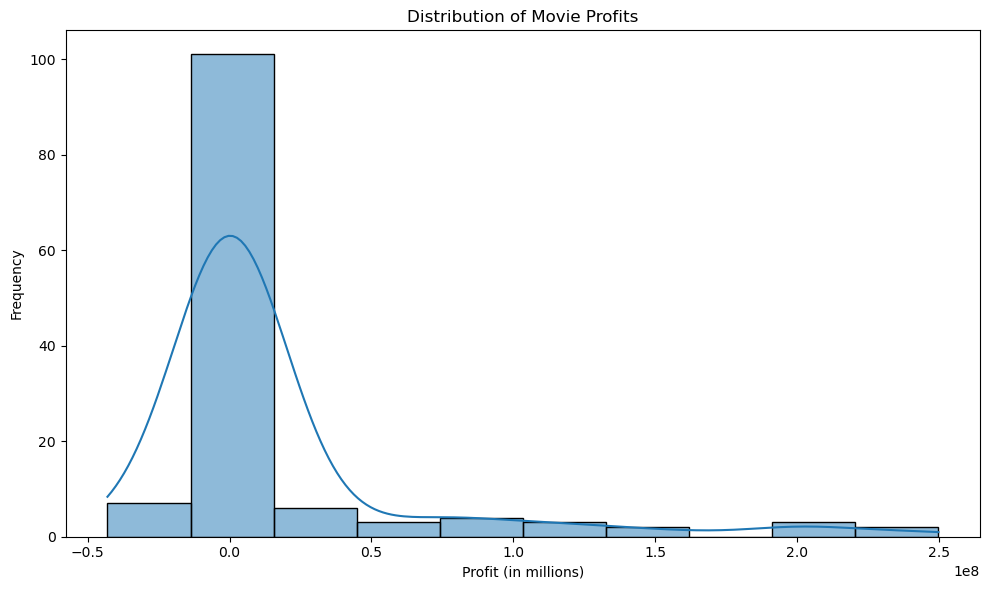

In [29]:
#filter out rows where revenue and budget are 0
filtered_rev_data = data[data['revenue'] != 0]
filtered_budget_data = filtered_rev_data[filtered_rev_data['budget'] != 0]






#histogram to show general profit distribution
filtered_budget_data['profit'] = filtered_budget_data['revenue'] - filtered_budget_data['budget']

plt.figure(figsize=(10,6))
sns.histplot(filtered_budget_data['profit'], bins=10, kde=True)
plt.title("Distribution of Movie Profits")
plt.xlabel("Profit (in millions)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [30]:
data['profit'] = data['revenue'] - data['budget']
data['roi'] = data['profit'] / (data['budget'] + 1)
data['is_profitable'] = (data['profit'] > 0).astype(int)





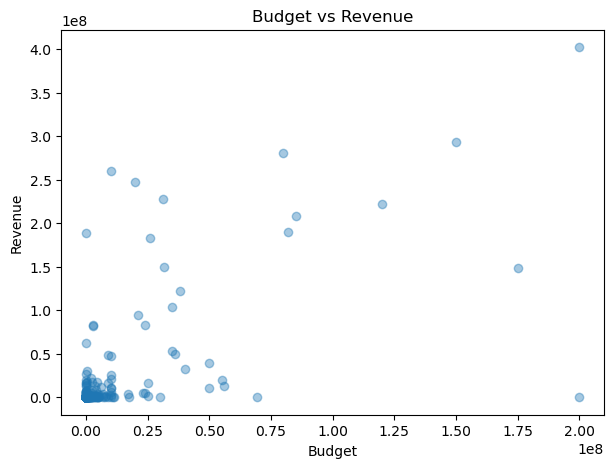

In [31]:
# Financial Performance: Budget vs Revenue

plt.figure(figsize=(7,5))
plt.scatter(data['budget'], data['revenue'], alpha=0.4)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()




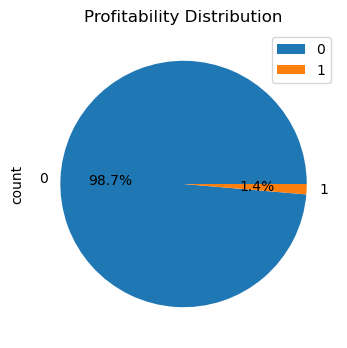

In [32]:
# Profitability Analysis
# Evaluate movie success

plt.figure(figsize=(6,4))
data['is_profitable'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Profitability Distribution')
plt.legend()
plt.show()